<a href="https://colab.research.google.com/github/Maqui2404/PQ/blob/main/Confiabilidad_TRI_Validez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONFIABILIDAD CRONBACH

In [ ]:
import pandas as pd

# Cargar el archivo Excel
file_path = 'Encuesta (1).xlsx'
data = pd.read_excel(file_path)

# Columnas a codificar
columns_to_encode = [
    'Disfruto de actividades culturales / I enjoy cultural activities',
    'Prefiero actividades de aventura / I prefer adventure activities',
    'Me gusta relajarme durante mis viajes / I like to relax during my travels',
    'Disfruto de la gastronomía durante mis viajes / I like gastronomy during my travels',
    'Disfruto escuchar cuentos y leyendas locales durante mis viajes / I enjoy listening to local tales and legends during my travels.',
    '¿Qué tan interesado está en usar una aplicación que ofrezca retos para explorar ciudades y lugares místicos? / How interested are you in using an app that offers challenges to explore cities and mystical places?',
    'Realidad aumentada para explorar lugares místicos / Augmented reality to explore mystical places',
    'Realidad virtual para visitar destinos antes del viaje / Virtual reality to visit destinations before traveling',
    'Recomendaciones personalizadas basadas en preferencias / Personalized recommendations based on preferences',
    'Gamificación y retos para ganar logros / Gamification and challenges to earn achievements',
    'Guías personalizadas por personajes históricos / Personalized guides by historical characters',
    'Rutas temáticas basadas en comida / Thematic routes based on food',
    'Rutas temáticas basadas en emociones / Thematic routes based on emotions',
    'Rutas temáticas basadas en cultura / Thematic routes based on culture',
    'Rutas temáticas basadas en aventura / Thematic routes based on adventure',
    'Rutas temáticas basadas en relajación / Thematic routes based on relaxation',
    'Juegos y retos basados en cuentos y leyendas / Games and challenges based on stories and legends'
]

# Mapeo de respuestas a valores numéricos
response_mapping = {
    'Totalmente de acuerdo': 5,
    'De acuerdo': 4,
    'Ni de acuerdo ni en desacuerdo (Neutral)': 3,
    'En desacuerdo': 2,
    'Totalmente en desacuerdo': 1,
    'Muy útil': 5,
    'Útil': 4,
    'Neutral': 3,
    'Poco útil': 2,
    'Nada útil': 1,
    'Muy interesado': 5,
    'Interesado': 4,
    'A veces': 3,
    'Poco interesado': 2,
    'Nada interesado': 1,
    'Muy dispuesto': 5,
    'Dispuesto': 4,
    'A veces dispuesto': 3,
    'Poco dispuesto': 2,
    'Nada dispuesto': 1
}

# Aplicar el mapeo
for col in columns_to_encode:
    data[col] = data[col].map(response_mapping)

# Eliminar filas con valores NaN que resultan del mapeo
data_clean = data.dropna(subset=columns_to_encode)

# Función para calcular el alfa de Cronbach
def cronbach_alpha(df):
    df_corr = df.corr()
    n = df.shape[1]
    mean_corr = df_corr.mean().mean()
    return (n * mean_corr) / (1 + (n - 1) * mean_corr)

# Calcular el alfa de Cronbach
alpha = cronbach_alpha(data_clean[columns_to_encode])

print("Alfa de Cronbach:", alpha)


Alfa de Cronbach: 0.7467990166132698


# TRI

In [ ]:
pip install rasch

In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Cargar el archivo Excel
file_path = 'Encuesta (1).xlsx'
data = pd.read_excel(file_path)

# Columnas a codificar
columns_to_encode = [
    'Disfruto de actividades culturales / I enjoy cultural activities',
    'Prefiero actividades de aventura / I prefer adventure activities',
    'Me gusta relajarme durante mis viajes / I like to relax during my travels',
    'Disfruto de la gastronomía durante mis viajes / I like gastronomy during my travels',
    'Disfruto escuchar cuentos y leyendas locales durante mis viajes / I enjoy listening to local tales and legends during my travels.',
    '¿Qué tan interesado está en usar una aplicación que ofrezca retos para explorar ciudades y lugares místicos? / How interested are you in using an app that offers challenges to explore cities and mystical places?',
    'Realidad aumentada para explorar lugares místicos / Augmented reality to explore mystical places',
    'Realidad virtual para visitar destinos antes del viaje / Virtual reality to visit destinations before traveling',
    'Recomendaciones personalizadas basadas en preferencias / Personalized recommendations based on preferences',
    'Gamificación y retos para ganar logros / Gamification and challenges to earn achievements',
    'Guías personalizadas por personajes históricos / Personalized guides by historical characters',
    'Rutas temáticas basadas en comida / Thematic routes based on food',
    'Rutas temáticas basadas en emociones / Thematic routes based on emotions',
    'Rutas temáticas basadas en cultura / Thematic routes based on culture',
    'Rutas temáticas basadas en aventura / Thematic routes based on adventure',
    'Rutas temáticas basadas en relajación / Thematic routes based on relaxation',
    'Juegos y retos basados en cuentos y leyendas / Games and challenges based on stories and legends'
]

# Mapeo de respuestas a valores numéricos
response_mapping = {
    'Totalmente de acuerdo': 5,
    'De acuerdo': 4,
    'Ni de acuerdo ni en desacuerdo (Neutral)': 3,
    'En desacuerdo': 2,
    'Totalmente en desacuerdo': 1,
    'Muy útil': 5,
    'Útil': 4,
    'Neutral': 3,
    'Poco útil': 2,
    'Nada útil': 1,
    'Muy interesado': 5,
    'Interesado': 4,
    'A veces': 3,
    'Poco interesado': 2,
    'Nada interesado': 1,
    'Muy dispuesto': 5,
    'Dispuesto': 4,
    'A veces dispuesto': 3,
    'Poco dispuesto': 2,
    'Nada dispuesto': 1
}

# Aplicar el mapeo
for col in columns_to_encode:
    data[col] = data[col].map(response_mapping)

# Eliminar filas con valores NaN que resultan del mapeo
data_clean = data.dropna(subset=columns_to_encode)

# Crear una matriz de respuestas
responses = data_clean[columns_to_encode].values

# Modelo de Rasch
def rasch_model(params, response_matrix):
    theta = params[:response_matrix.shape[0]]
    b = params[response_matrix.shape[0]:]
    P = 1 / (1 + np.exp(b - theta[:, None]))
    log_likelihood = np.sum(response_matrix * np.log(P) + (1 - response_matrix) * np.log(1 - P))
    return -log_likelihood

# Inicialización de parámetros
num_items = responses.shape[1]
num_respondents = responses.shape[0]
initial_params = np.zeros(num_respondents + num_items)

# Estimación de parámetros
result = minimize(rasch_model, initial_params, args=(responses,), method='L-BFGS-B')

# Obtener los parámetros estimados
theta_est = result.x[:num_respondents]
b_est = result.x[num_respondents:]

# Mostrar la dificultad de los ítems
difficulty_df = pd.DataFrame({
    'Item': columns_to_encode,
    'Difficulty': b_est
})

difficulty_df = difficulty_df.sort_values(by='Difficulty')
print(difficulty_df)


                                                 Item  Difficulty
4   Disfruto escuchar cuentos y leyendas locales d...   -5.636765
0   Disfruto de actividades culturales / I enjoy c...   -5.053705
5   ¿Qué tan interesado está en usar una aplicació...   -4.471328
13  Rutas temáticas basadas en cultura / Thematic ...   -4.471328
10  Guías personalizadas por personajes históricos...   -4.471303
15  Rutas temáticas basadas en relajación / Themat...   -4.471303
2   Me gusta relajarme durante mis viajes / I like...   -4.471303
6   Realidad aumentada para explorar lugares místi...   -3.889610
12  Rutas temáticas basadas en emociones / Themati...   -3.889610
11  Rutas temáticas basadas en comida / Thematic r...   -3.889610
14  Rutas temáticas basadas en aventura / Thematic...   -3.889610
8   Recomendaciones personalizadas basadas en pref...   -3.889610
16  Juegos y retos basados en cuentos y leyendas /...   -3.889610
3   Disfruto de la gastronomía durante mis viajes ...   -3.308603
1   Prefie

<ipython-input-8-fabdd580fe0f>:69: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.sum(response_matrix * np.log(P) + (1 - response_matrix) * np.log(1 - P))
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Cargar el archivo Excel
file_path = 'Encuesta (1).xlsx'
data = pd.read_excel(file_path)

# Columnas a codificar
columns_to_encode = [
    'Disfruto de actividades culturales / I enjoy cultural activities',
    'Prefiero actividades de aventura / I prefer adventure activities',
    'Me gusta relajarme durante mis viajes / I like to relax during my travels',
    'Disfruto de la gastronomía durante mis viajes / I like gastronomy during my travels',
    'Disfruto escuchar cuentos y leyendas locales durante mis viajes / I enjoy listening to local tales and legends during my travels.',
    '¿Qué tan interesado está en usar una aplicación que ofrezca retos para explorar ciudades y lugares místicos? / How interested are you in using an app that offers challenges to explore cities and mystical places?',
    'Realidad aumentada para explorar lugares místicos / Augmented reality to explore mystical places',
    'Realidad virtual para visitar destinos antes del viaje / Virtual reality to visit destinations before traveling',
    'Recomendaciones personalizadas basadas en preferencias / Personalized recommendations based on preferences',
    'Gamificación y retos para ganar logros / Gamification and challenges to earn achievements',
    'Guías personalizadas por personajes históricos / Personalized guides by historical characters',
    'Rutas temáticas basadas en comida / Thematic routes based on food',
    'Rutas temáticas basadas en emociones / Thematic routes based on emotions',
    'Rutas temáticas basadas en cultura / Thematic routes based on culture',
    'Rutas temáticas basadas en aventura / Thematic routes based on adventure',
    'Rutas temáticas basadas en relajación / Thematic routes based on relaxation',
    'Juegos y retos basados en cuentos y leyendas / Games and challenges based on stories and legends'
]

# Mapeo de respuestas a valores numéricos
response_mapping = {
    'Totalmente de acuerdo': 5,
    'De acuerdo': 4,
    'Ni de acuerdo ni en desacuerdo (Neutral)': 3,
    'En desacuerdo': 2,
    'Totalmente en desacuerdo': 1,
    'Muy útil': 5,
    'Útil': 4,
    'Neutral': 3,
    'Poco útil': 2,
    'Nada útil': 1,
    'Muy interesado': 5,
    'Interesado': 4,
    'A veces': 3,
    'Poco interesado': 2,
    'Nada interesado': 1,
    'Muy dispuesto': 5,
    'Dispuesto': 4,
    'A veces dispuesto': 3,
    'Poco dispuesto': 2,
    'Nada dispuesto': 1
}

# Aplicar el mapeo
for col in columns_to_encode:
    data[col] = data[col].map(response_mapping)

# Eliminar filas con valores NaN que resultan del mapeo
data_clean = data.dropna(subset=columns_to_encode)

# Crear una matriz de respuestas
responses = data_clean[columns_to_encode].values

# Modelo de Rasch
def rasch_model(params, response_matrix):
    theta = params[:response_matrix.shape[0]]
    b = params[response_matrix.shape[0]:]
    P = 1 / (1 + np.exp(b - theta[:, None]))
    # Evitar valores de P exactamente 0 o 1
    P = np.clip(P, 1e-6, 1 - 1e-6)
    log_likelihood = np.sum(response_matrix * np.log(P) + (1 - response_matrix) * np.log(1 - P))
    return -log_likelihood

# Inicialización de parámetros
num_items = responses.shape[1]
num_respondents = responses.shape[0]
initial_params = np.zeros(num_respondents + num_items)

# Estimación de parámetros
result = minimize(rasch_model, initial_params, args=(responses,), method='L-BFGS-B')

# Obtener los parámetros estimados
theta_est = result.x[:num_respondents]
b_est = result.x[num_respondents:]

# Mostrar la dificultad de los ítems
difficulty_df = pd.DataFrame({
    'Item': columns_to_encode,
    'Difficulty': b_est
})

difficulty_df = difficulty_df.sort_values(by='Difficulty')
print(difficulty_df)


                                                 Item  Difficulty
4   Disfruto escuchar cuentos y leyendas locales d...   -5.636765
0   Disfruto de actividades culturales / I enjoy c...   -5.053705
5   ¿Qué tan interesado está en usar una aplicació...   -4.471328
13  Rutas temáticas basadas en cultura / Thematic ...   -4.471328
10  Guías personalizadas por personajes históricos...   -4.471303
15  Rutas temáticas basadas en relajación / Themat...   -4.471303
2   Me gusta relajarme durante mis viajes / I like...   -4.471303
6   Realidad aumentada para explorar lugares místi...   -3.889610
12  Rutas temáticas basadas en emociones / Themati...   -3.889610
11  Rutas temáticas basadas en comida / Thematic r...   -3.889610
14  Rutas temáticas basadas en aventura / Thematic...   -3.889610
8   Recomendaciones personalizadas basadas en pref...   -3.889610
16  Juegos y retos basados en cuentos y leyendas /...   -3.889610
3   Disfruto de la gastronomía durante mis viajes ...   -3.308603
1   Prefie

# VALIDEZ FAC

In [ ]:
pip install factor-analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42564 sha256=a4f91fb734c86e850b951cba39211e081449d79e02c4ca2c942356ad67eb4007
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor-analyzer


In [ ]:
import pandas as pd

# Cargar el archivo Excel
file_path = 'Encuesta (3).xlsx'
data = pd.read_excel(file_path)

# Encontrar valores NaN
nan_data = data.isna()

# Mostrar las filas que contienen NaNs
rows_with_nan = data[nan_data.any(axis=1)]

# Imprimir las filas con NaNs
print(rows_with_nan)


Empty DataFrame
Columns: [Marca temporal, Edad, Género, ¿Con qué frecuencia utiliza tecnología en sus viajes? / How often do you use technology in your travels?, Disfruto de actividades culturales / I enjoy cultural activities, Prefiero actividades de aventura / I prefer adventure activities, Me gusta relajarme durante mis viajes / I like to relax during my travels, Disfruto de la gastronomía durante mis viajes / I like gastronomy during my travels, Disfruto escuchar cuentos y leyendas locales durante mis viajes / I enjoy listening to local tales and legends during my travels., ¿Qué tan interesado está en usar una aplicación que ofrezca retos para explorar ciudades y lugares místicos? / How interested are you in using an app that offers challenges to explore cities and mystical places?, Realidad aumentada para explorar lugares místicos / Augmented reality to explore mystical places, Realidad virtual para visitar destinos antes del viaje / Virtual reality to visit destinations before tr

Valores NaN en la columna Disfruto de la gastronomía durante mis viajes / I like gastronomy during my travels
Valores NaN en la columna Disfruto escuchar cuentos y leyendas locales durante mis viajes / I enjoy listening to local tales and legends during my travels.
Valores NaN en la columna Rutas temáticas basadas en comida / Thematic routes based on food
Valores NaN en la columna Rutas temáticas basadas en emociones / Thematic routes based on emotions
Valores NaN en la columna Rutas temáticas basadas en cultura / Thematic routes based on culture
Valores NaN en la columna Rutas temáticas basadas en aventura / Thematic routes based on adventure
Valores NaN en la columna Rutas temáticas basadas en relajación / Thematic routes based on relaxation
Valores NaN en la columna Juegos y retos basados en cuentos y leyendas / Games and challenges based on stories and legends
Verificación final de la matriz de respuestas:
Valores NaN: False
Valores infinitos: False
KMO: nan
Prueba de Bartlett: nan

/usr/local/lib/python3.10/dist-packages/factor_analyzer/factor_analyzer.py:109: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


                                                           0         1  \
Disfruto de actividades culturales / I enjoy cu...  0.709635  0.147453   
Prefiero actividades de aventura / I prefer adv...  0.798084 -0.056407   
Me gusta relajarme durante mis viajes / I like ...  0.842275  0.370345   
Disfruto de la gastronomía durante mis viajes /...  0.035562 -0.127981   
Disfruto escuchar cuentos y leyendas locales du...  0.778715  0.569507   
¿Qué tan interesado está en usar una aplicación...  0.737779  0.358255   
Realidad aumentada para explorar lugares místic...  0.830024  0.044872   
Realidad virtual para visitar destinos antes de...  0.383485  0.237924   
Recomendaciones personalizadas basadas en prefe...  0.849131 -0.290334   
Gamificación y retos para ganar logros / Gamifi...  0.080105  0.296313   
Guías personalizadas por personajes históricos ...  0.726532 -0.301579   
Rutas temáticas basadas en comida / Thematic ro... -0.023084  0.075575   
Rutas temáticas basadas en emociones /

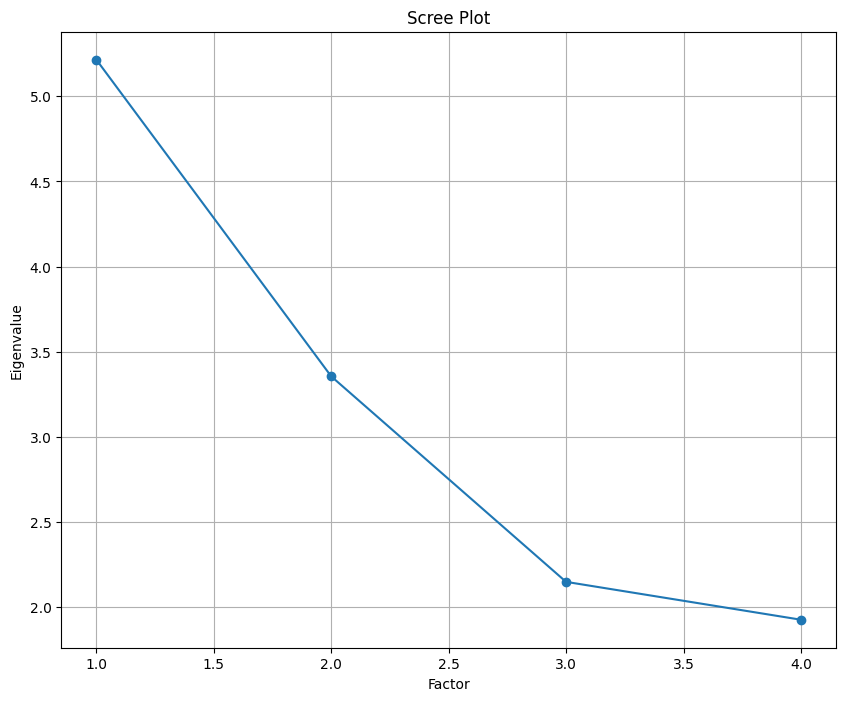

In [ ]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
import matplotlib.pyplot as plt

# Cargar el archivo Excel actualizado
file_path = 'Encuesta (3).xlsx'
data = pd.read_excel(file_path)

# Columnas a codificar
columns_to_encode = [
    'Disfruto de actividades culturales / I enjoy cultural activities',
    'Prefiero actividades de aventura / I prefer adventure activities',
    'Me gusta relajarme durante mis viajes / I like to relax during my travels',
    'Disfruto de la gastronomía durante mis viajes / I like gastronomy during my travels',
    'Disfruto escuchar cuentos y leyendas locales durante mis viajes / I enjoy listening to local tales and legends during my travels.',
    '¿Qué tan interesado está en usar una aplicación que ofrezca retos para explorar ciudades y lugares místicos? / How interested are you in using an app that offers challenges to explore cities and mystical places?',
    'Realidad aumentada para explorar lugares místicos / Augmented reality to explore mystical places',
    'Realidad virtual para visitar destinos antes del viaje / Virtual reality to visit destinations before traveling',
    'Recomendaciones personalizadas basadas en preferencias / Personalized recommendations based on preferences',
    'Gamificación y retos para ganar logros / Gamification and challenges to earn achievements',
    'Guías personalizadas por personajes históricos / Personalized guides by historical characters',
    'Rutas temáticas basadas en comida / Thematic routes based on food',
    'Rutas temáticas basadas en emociones / Thematic routes based on emotions',
    'Rutas temáticas basadas en cultura / Thematic routes based on culture',
    'Rutas temáticas basadas en aventura / Thematic routes based on adventure',
    'Rutas temáticas basadas en relajación / Thematic routes based on relaxation',
    'Juegos y retos basados en cuentos y leyendas / Games and challenges based on stories and legends'
]

# Mapeo de respuestas a valores numéricos
response_mapping = {
    'Totalmente de acuerdo': 5,
    'De acuerdo': 4,
    'Ni de acuerdo ni en desacuerdo (Neutral)': 3,
    'En desacuerdo': 2,
    'Totalmente en desacuerdo': 1,
    'Muy útil': 5,
    'Útil': 4,
    'Neutral': 3,
    'Poco útil': 2,
    'Nada útil': 1,
    'Muy interesado': 5,
    'Interesado': 4,
    'A veces': 3,
    'Poco interesado': 2,
    'Nada interesado': 1,
    'Muy dispuesto': 5,
    'Dispuesto': 4,
    'A veces dispuesto': 3,
    'Poco dispuesto': 2,
    'Nada dispuesto': 1
}

# Aplicar el mapeo y verificar valores problemáticos
for col in columns_to_encode:
    data[col] = data[col].map(response_mapping)
    if data[col].isnull().sum() > 0:
        print(f"Valores NaN en la columna {col}")
        data[col].fillna(data[col].mean(), inplace=True)  # Imputar NaN con la media de la columna
    if np.isinf(data[col]).sum() > 0:
        print(f"Valores infinitos en la columna {col}")
        data[col].replace([np.inf, -np.inf], data[col].mean(), inplace=True)  # Reemplazar infinitos con la media de la columna

# Crear una matriz de respuestas
responses = data[columns_to_encode].values

# Verificar si hay valores infinitos o NaN
if np.any(np.isnan(responses)):
    print("Hay valores NaN en la matriz de respuestas.")
if np.any(np.isinf(responses)):
    print("Hay valores infinitos en la matriz de respuestas.")

# Reemplazar valores NaN o infinitos por ceros (o cualquier otro valor adecuado)
responses = np.nan_to_num(responses, nan=0.0, posinf=0.0, neginf=0.0)

# Verificar nuevamente la matriz
print("Verificación final de la matriz de respuestas:")
print("Valores NaN:", np.any(np.isnan(responses)))
print("Valores infinitos:", np.any(np.isinf(responses)))

# Calcular KMO y prueba de Bartlett
kmo_all, kmo_model = calculate_kmo(responses)
bartlett_test, bartlett_p = calculate_bartlett_sphericity(responses)

print('KMO:', kmo_model)
print('Prueba de Bartlett:', bartlett_test, 'p-valor:', bartlett_p)

# Realizar el análisis factorial exploratorio
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(responses)

# Cargar factorial
loadings = fa.loadings_

# Imprimir los loadings
loadings_df = pd.DataFrame(loadings, index=columns_to_encode)
print(loadings_df)

# Varianza explicada por factor
variance = fa.get_factor_variance()
variance_df = pd.DataFrame(variance, index=['Variance', 'Proportional Variance', 'Cumulative Variance'])
print(variance_df)

# Scree plot
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(variance[0]) + 1), variance[0], 'o-')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid()
plt.show()


Valores NaN en la columna Disfruto de la gastronomía durante mis viajes / I like gastronomy during my travels
Valores NaN en la columna Disfruto escuchar cuentos y leyendas locales durante mis viajes / I enjoy listening to local tales and legends during my travels.
Valores NaN en la columna Rutas temáticas basadas en comida / Thematic routes based on food
Valores NaN en la columna Rutas temáticas basadas en emociones / Thematic routes based on emotions
Valores NaN en la columna Rutas temáticas basadas en cultura / Thematic routes based on culture
Valores NaN en la columna Rutas temáticas basadas en aventura / Thematic routes based on adventure
Valores NaN en la columna Rutas temáticas basadas en relajación / Thematic routes based on relaxation
Valores NaN en la columna Juegos y retos basados en cuentos y leyendas / Games and challenges based on stories and legends
Verificación final de la matriz de respuestas:
Valores NaN: False
Valores infinitos: False
KMO: nan
                       

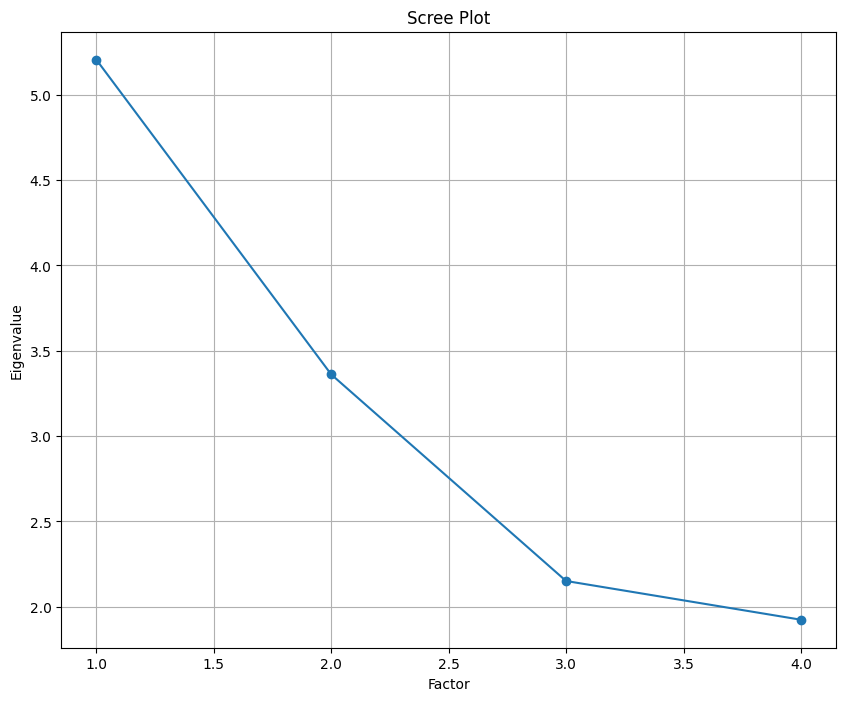

In [ ]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Cargar el archivo Excel
file_path = 'Encuesta (1).xlsx'
data = pd.read_excel(file_path)

# Columnas a codificar
columns_to_encode = [
    'Disfruto de actividades culturales / I enjoy cultural activities',
    'Prefiero actividades de aventura / I prefer adventure activities',
    'Me gusta relajarme durante mis viajes / I like to relax during my travels',
    'Disfruto de la gastronomía durante mis viajes / I like gastronomy during my travels',
    'Disfruto escuchar cuentos y leyendas locales durante mis viajes / I enjoy listening to local tales and legends during my travels.',
    '¿Qué tan interesado está en usar una aplicación que ofrezca retos para explorar ciudades y lugares místicos? / How interested are you in using an app that offers challenges to explore cities and mystical places?',
    'Realidad aumentada para explorar lugares místicos / Augmented reality to explore mystical places',
    'Realidad virtual para visitar destinos antes del viaje / Virtual reality to visit destinations before traveling',
    'Recomendaciones personalizadas basadas en preferencias / Personalized recommendations based on preferences',
    'Gamificación y retos para ganar logros / Gamification and challenges to earn achievements',
    'Guías personalizadas por personajes históricos / Personalized guides by historical characters',
    'Rutas temáticas basadas en comida / Thematic routes based on food',
    'Rutas temáticas basadas en emociones / Thematic routes based on emotions',
    'Rutas temáticas basadas en cultura / Thematic routes based on culture',
    'Rutas temáticas basadas en aventura / Thematic routes based on adventure',
    'Rutas temáticas basadas en relajación / Thematic routes based on relaxation',
    'Juegos y retos basados en cuentos y leyendas / Games and challenges based on stories and legends'
]

# Mapeo de respuestas a valores numéricos
response_mapping = {
    'Totalmente de acuerdo': 5,
    'De acuerdo': 4,
    'Ni de acuerdo ni en desacuerdo (Neutral)': 3,
    'En desacuerdo': 2,
    'Totalmente en desacuerdo': 1,
    'Muy útil': 5,
    'Útil': 4,
    'Neutral': 3,
    'Poco útil': 2,
    'Nada útil': 1,
    'Muy interesado': 5,
    'Interesado': 4,
    'A veces': 3,
    'Poco interesado': 2,
    'Nada interesado': 1,
    'Muy dispuesto': 5,
    'Dispuesto': 4,
    'A veces dispuesto': 3,
    'Poco dispuesto': 2,
    'Nada dispuesto': 1
}

# Aplicar el mapeo y verificar valores problemáticos
for col in columns_to_encode:
    data[col] = data[col].map(response_mapping)
    if data[col].isnull().sum() > 0:
        print(f"Valores NaN en la columna {col}")
        data[col].fillna(data[col].mean(), inplace=True)  # Imputar NaN con la media de la columna
    if np.isinf(data[col]).sum() > 0:
        print(f"Valores infinitos en la columna {col}")
        data[col].replace([np.inf, -np.inf], data[col].mean(), inplace=True)  # Reemplazar infinitos con la media de la columna

# Crear una matriz de respuestas
responses = data[columns_to_encode].values

# Verificar si hay valores infinitos o NaN
if np.any(np.isnan(responses)):
    print("Hay valores NaN en la matriz de respuestas.")
if np.any(np.isinf(responses)):
    print("Hay valores infinitos en la matriz de respuestas.")

# Reemplazar valores NaN o infinitos por ceros (o cualquier otro valor adecuado)
responses = np.nan_to_num(responses, nan=0.0, posinf=0.0, neginf=0.0)

# Verificar nuevamente la matriz
print("Verificación final de la matriz de respuestas:")
print("Valores NaN:", np.any(np.isnan(responses)))
print("Valores infinitos:", np.any(np.isinf(responses)))

# Realizar el análisis factorial exploratorio
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(responses)

# Verificar la adecuación del muestreo
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(responses)
print('KMO:', kmo_model)

# Cargar factorial
loadings = fa.loadings_

# Imprimir los loadings
loadings_df = pd.DataFrame(loadings, index=columns_to_encode)
print(loadings_df)

# Varianza explicada por factor
variance = fa.get_factor_variance()
variance_df = pd.DataFrame(variance, index=['Variance', 'Proportional Variance', 'Cumulative Variance'])
print(variance_df)

# Scree plot
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(variance[0]) + 1), variance[0], 'o-')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid()
plt.show()


Valores NaN en la columna Disfruto de la gastronomía durante mis viajes / I like gastronomy during my travels
Valores NaN en la columna Disfruto escuchar cuentos y leyendas locales durante mis viajes / I enjoy listening to local tales and legends during my travels.
Valores NaN en la columna Rutas temáticas basadas en comida / Thematic routes based on food
Valores NaN en la columna Rutas temáticas basadas en emociones / Thematic routes based on emotions
Valores NaN en la columna Rutas temáticas basadas en cultura / Thematic routes based on culture
Valores NaN en la columna Rutas temáticas basadas en aventura / Thematic routes based on adventure
Valores NaN en la columna Rutas temáticas basadas en relajación / Thematic routes based on relaxation
Valores NaN en la columna Juegos y retos basados en cuentos y leyendas / Games and challenges based on stories and legends
Verificación final de la matriz de respuestas:
Valores NaN: False
Valores infinitos: False
KMO: nan
                       

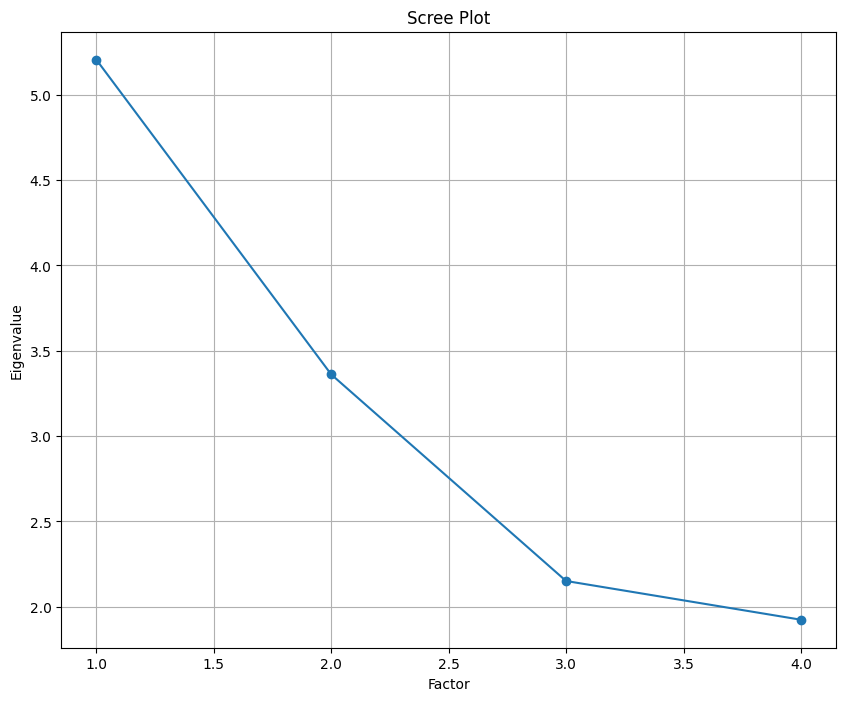

In [ ]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

# Cargar el archivo Excel
file_path = 'Encuesta (1).xlsx'
data = pd.read_excel(file_path)

# Columnas a codificar
columns_to_encode = [
    'Disfruto de actividades culturales / I enjoy cultural activities',
    'Prefiero actividades de aventura / I prefer adventure activities',
    'Me gusta relajarme durante mis viajes / I like to relax during my travels',
    'Disfruto de la gastronomía durante mis viajes / I like gastronomy during my travels',
    'Disfruto escuchar cuentos y leyendas locales durante mis viajes / I enjoy listening to local tales and legends during my travels.',
    '¿Qué tan interesado está en usar una aplicación que ofrezca retos para explorar ciudades y lugares místicos? / How interested are you in using an app that offers challenges to explore cities and mystical places?',
    'Realidad aumentada para explorar lugares místicos / Augmented reality to explore mystical places',
    'Realidad virtual para visitar destinos antes del viaje / Virtual reality to visit destinations before traveling',
    'Recomendaciones personalizadas basadas en preferencias / Personalized recommendations based on preferences',
    'Gamificación y retos para ganar logros / Gamification and challenges to earn achievements',
    'Guías personalizadas por personajes históricos / Personalized guides by historical characters',
    'Rutas temáticas basadas en comida / Thematic routes based on food',
    'Rutas temáticas basadas en emociones / Thematic routes based on emotions',
    'Rutas temáticas basadas en cultura / Thematic routes based on culture',
    'Rutas temáticas basadas en aventura / Thematic routes based on adventure',
    'Rutas temáticas basadas en relajación / Thematic routes based on relaxation',
    'Juegos y retos basados en cuentos y leyendas / Games and challenges based on stories and legends'
]

# Mapeo de respuestas a valores numéricos
response_mapping = {
    'Totalmente de acuerdo': 5,
    'De acuerdo': 4,
    'Ni de acuerdo ni en desacuerdo (Neutral)': 3,
    'En desacuerdo': 2,
    'Totalmente en desacuerdo': 1,
    'Muy útil': 5,
    'Útil': 4,
    'Neutral': 3,
    'Poco útil': 2,
    'Nada útil': 1,
    'Muy interesado': 5,
    'Interesado': 4,
    'A veces': 3,
    'Poco interesado': 2,
    'Nada interesado': 1,
    'Muy dispuesto': 5,
    'Dispuesto': 4,
    'A veces dispuesto': 3,
    'Poco dispuesto': 2,
    'Nada dispuesto': 1
}

# Aplicar el mapeo y verificar valores problemáticos
for col in columns_to_encode:
    data[col] = data[col].map(response_mapping)
    if data[col].isnull().sum() > 0:
        print(f"Valores NaN en la columna {col}")
        data[col].fillna(data[col].mean(), inplace=True)  # Imputar NaN con la media de la columna
    if np.isinf(data[col]).sum() > 0:
        print(f"Valores infinitos en la columna {col}")
        data[col].replace([np.inf, -np.inf], data[col].mean(), inplace=True)  # Reemplazar infinitos con la media de la columna

# Crear una matriz de respuestas
responses = data[columns_to_encode].values

# Verificar si hay valores infinitos o NaN
if np.any(np.isnan(responses)):
    print("Hay valores NaN en la matriz de respuestas.")
if np.any(np.isinf(responses)):
    print("Hay valores infinitos en la matriz de respuestas.")

# Reemplazar valores NaN o infinitos por ceros (o cualquier otro valor adecuado)
responses = np.nan_to_num(responses, nan=0.0, posinf=0.0, neginf=0.0)

# Verificar nuevamente la matriz
print("Verificación final de la matriz de respuestas:")
print("Valores NaN:", np.any(np.isnan(responses)))
print("Valores infinitos:", np.any(np.isinf(responses)))

# Realizar el análisis factorial exploratorio
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(responses)

# Verificar la adecuación del muestreo
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(responses)
print('KMO:', kmo_model)

# Cargar factorial
loadings = fa.loadings_

# Imprimir los loadings
loadings_df = pd.DataFrame(loadings, index=columns_to_encode)
print(loadings_df)

# Varianza explicada por factor
variance = fa.get_factor_variance()
variance_df = pd.DataFrame(variance, index=['Variance', 'Proportional Variance', 'Cumulative Variance'])
print(variance_df)

# Scree plot
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(variance[0]) + 1), variance[0], 'o-')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid()
plt.show()
